In [1]:
# !pip install jupyterlab "ipywidgets>=7.5" 
# !pip install npm
# !conda install -c conda-forge nodejs
# !pip install plotly

In [2]:
# 加载必要库
import pandas as pd # 数据分析库
import numpy as np # 矩阵计算
import matplotlib.pyplot as plt # 画图

import plotly.express as px # 画图
from statsmodels.graphics.gofplots import qqplot # 统计模型
import seaborn as sns # 统计绘图
%matplotlib inline

# 避免产生报警告
import warnings 
warnings.filterwarnings('ignore')

## 数据加载

In [3]:
# 加载数据
## 参考链接：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston
# data_url = "http://lib.stat.cmu.edu/datasets/boston" # 数据来源
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) # 用pandas读csv文件
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

In [4]:
house = pd.read_csv("./data/boston.csv")
house.head() # 读前五行

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


特征：
- CRIM：按城镇划分的人均犯罪率
- ZN：划分为超过 25,000 平方英尺地块的住宅用地比例。
- INDUS：每个城镇的非零售商业用地的比例
- CHAS：Charles River 虚拟变量（如果区域以河流为界，则为 1；否则为 0）
- NOX：一氧化氮浓度（每 1000 万分之一）[parts/10M]
- RM：每户住宅的平均房间数
- AGE：1940 年之前建造的自住单元的比例
- DIS：到波士顿五个就业中心的加权距离
- RAD：通往径向高速公路的指数
- TAX：全每 10,000 美元的价值财产税率 [\$/10k]
- PTRATIO：按城镇划分的师生比例
- B：等式 $B=1000(Bk - 0.63)^2$ 的结果，其中 $Bk$ 是城镇中黑人的比例
- LSTAT：人口地位较低的百分比

标签：

MEDV：自住房屋的中位数价值 1000 美元 [k\$]

## 数据概况

In [5]:
# 数据的规模
house.shape

(506, 14)

可以看到，本次我们用到的数据集总共有506条样本(行)也就是有506套房子的数据；同时有14列，其中13列是特征，也就是每个房子会有13个属性特征，例如：住宅的房间数、交通方便度等信息，最后一列是房子的标签——房价. 这个数据集主要的一个想法是，利用房子的13个属性特征，对房子的价格进行预测. 

In [20]:
# 数据集的每一列的列名
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
# 对数据集数据的基本统计描述
# 这个命令非常便捷，呈现了这个数据集的基本统计分布，这是对每一列而言的，统计量包括：最大值，最小值，
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


> ```df.describe()```这个命令非常便捷，呈现了这个数据集的基本统计分布，这是对每一列数值型变量而言的，统计量包括：频数，均值，方差，最大值，最小值，中位数，25，75分位数.

从这个表我们呢可以大致获得一些处理思路，如：
- 从第一行我们可以看到所有的```count```也就是数目统计，所有特征都是506等于样本数的，说明这个数据集至少是没有缺失值的.
- 第一列```CRIM```是一个犯罪率，是一个在$[0,1]$之间的实数，自然75%分位数，最大值都不可能超过1，所以显然这一列的数据是有异常的，后面我们需要进行一些处理.
- 对于```TAX```，我们可以看到它的方差非常的大，因此在后续的处理过程中，我们可以采用一些降维的手段如：主成分分析（PCA）等.

> 有时候我们也可以通过```df.info()```去对数据集作一个简单的概述，更多的是看确实情况，以及变量的类型，通过变量类型分析数据处理的方法.

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 数据处理
### 缺失值处理
为了给大家演示缺失值的处理，我们在Boston房价数据集的基础上手动删除了一些数据，来模拟数据的缺失，存为以```boston_null.csv```文件，下面以该文件进行讲解.



In [8]:
null = pd.read_csv("./data/boston_null.csv")
null.head() # 读前五行

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,NaN,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      504 non-null    float64
 5   RM       504 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      491 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        453 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


显然可以看到样本总数为506，非空值不等于506的即为含有缺失值的特征.

<img src="./figures/1_1.png">

对于发现缺失值有几种方式：
1. 直接对```null```进行计数



In [10]:
null.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         2
RM          2
AGE         1
DIS        15
RAD         0
TAX         0
PTRATIO     0
B          53
LSTAT       0
MEDV        0
dtype: int64

2. 缺失值可视化

<AxesSubplot:>

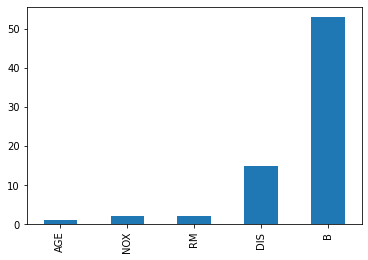

In [11]:
# 缺失值可视化
missing = null.isnull().sum()
missing = missing[missing > 0] # 筛选出有缺失值（大于0）的特征
missing.sort_values(inplace = True) # 排序
missing.plot.bar() # 调用pandas内置的条形图绘制

对于缺失值我们还可以采用热力图进行可视化，

<AxesSubplot:>

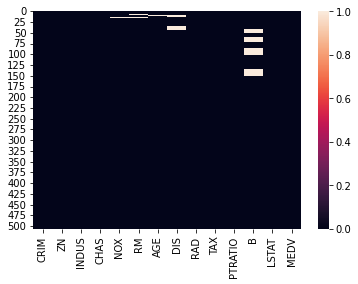

In [12]:
sns.heatmap(null.isnull())

这种方式还可以帮助我们看出缺失的位置，如果有些样本出现大量特征缺失的情况，在样本足够大的情况下也可以考虑删除.

3. 统计缺失比例

In [13]:
A = [] 
for col in null.columns:
    A.append((col,
             null[col].isnull().sum() * 100 / null.shape[0]))
pd.DataFrame(A, columns=['Features', 'missing rate'])

,Features,missing rate
0,CRIM,0.000000
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.395257
5,RM,0.395257
6,AGE,0.197628
7,DIS,2.964427
8,RAD,0.000000
9,TAX,0.000000


从上表，我们统计了每一个特征的缺失比例，一般来说，如果缺失值超过95%的特征，我们会考虑删除它，因为意义不大. 此外，另一类特征也可以考虑删除，那就是方差特别小，或者说取值唯一的特征是没有意义的. 举个例子，如果在一次考试中，大家的数学成绩都是100分，那么其实我们是没有办法通过数学成绩来区分每位同学的能力的，也就是说数学这门课没有区分性，所以不具有分析的意义，可以删掉.

在Pandas中，我们可以采用```df.nunique()```来统计每个每个特征会有多少个不同取值.

In [14]:
null.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         445
AGE        356
DIS        401
RAD          9
TAX         66
PTRATIO     46
B          326
LSTAT      455
MEDV       229
dtype: int64

为了更完美的呈现，我们将特征的唯一值个数一并加入到上面的统计表中，并且封装成函数，方便后续直接使用.

In [15]:
def df_stats(df):
    '''
    统计该df的缺失值，比例以及唯一值个数.
    '''
    L = []
    for col in df.columns:
        L.append((col, 
                  df[col].isnull().sum(),
                  df[col].isnull().sum() * 100 / df.shape[0],
                  df[col].nunique()))
    res = pd.DataFrame(L, columns = ['Feature', 
                                     'missing num',
                                     'missing rate',
                                     'unique num']) 
    return res

In [16]:
df_stats(null)

,Feature,missing num,missing rate,unique num
0,CRIM,0,0.000000,504
1,ZN,0,0.000000,26
2,INDUS,0,0.000000,76
3,CHAS,0,0.000000,2
4,NOX,2,0.395257,81
5,RM,2,0.395257,445
6,AGE,1,0.197628,356
7,DIS,15,2.964427,401
8,RAD,0,0.000000,9
9,TAX,0,0.000000,66


这下一目了然了！在这里我们呢简单粗暴的用均值填充，后面有机会我们会总结一下缺失值的处理方式.

In [17]:
null = null.fillna(null.mean()) # 用均值填充

<AxesSubplot:>

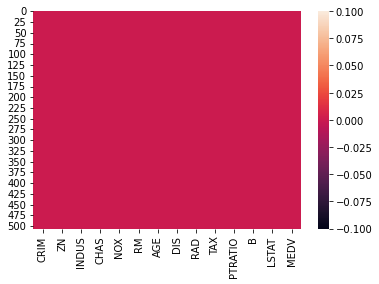

In [18]:
sns.heatmap(null.isnull())

可见现在已经没有缺失值了.

### 变量分析

<img src="./figures/1_2_特征分析思路.png">

在变量分析中，我们延续了在概率论与数理统计中的研究思想.在概率论与数理统计中，我们首先研究了单变量随机变量的性质与特征刻画，研究透了之后，我们转而研究随机变量之间的关系. 在数据分析中亦是如此，我们会先分析一个变量的情况，包括但不限于：数据类型、分布情况、是否有离群值······；研究完单变量之后，转而研究变量之间的关系：相关性分析、分组统计···

#### 单变量分析
1. **分析标签**

首先是对于数据集标签的分析，你要弄清楚所拿到的任务要求你做什么？说白了就是明白任务的需求，简单来说数据挖掘任务主要分为两类：**回归**与**分类**.回归是指标签值是连续值的任务，例如我们用到的这个数据集，要求预测房价信息，房价是一个连续的变量，因此这样的任务属于**回归问题(Regression)**.数据科学中另外一个经典的数据集是——鸢尾花(Iris)数据集，它收集了三种鸢尾花的萼片长度，宽度等信息，要求你根据这些信息预测鸢尾花属于哪种类别，因此它的标签就是1，2，3，代表三类鸢尾花. 像这种标签是离散的数据分析任务就属于**分类任务**.

In [23]:
house["MEDV"].nunique()

229

从标签的取值上，我们可以大致判断出本次任务属于回归型任务，因为它的取值个数比较多. 但这不是判断的标准，只是一个判断的参考，主要还是要分析题目的任务需求.

In [24]:
# 打印标签的统计信息
house["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

从标签列的统计信息我们可以大致看出，其分布还算比较正常，没有太大的方差（方差太大说明数据不太可能是正态的，因为够不集中）. 也没有出现我们在前面提到的，在定义域之外的值出现（对于是否有离群值后面我们需要通过箱线图或者散点图等可视化分析后才能得知）. 接下来我们来画出其密度分布图，看看标签取值的总体分布情况：

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

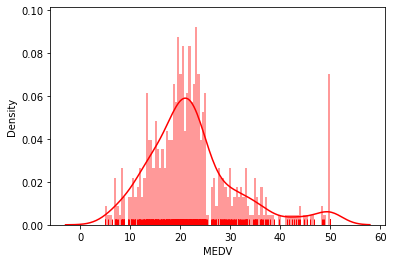

In [41]:
plt.figure()
sns.distplot(house["MEDV"],
            bins=100,#柱子的个数
            hist=True,#是否绘制直方图
            kde=True,#是否绘制密度图
            rug=True,#数据分布标尺
            color='r',#颜色
#             vertical=False,#是否水平绘制
#             norm_hist=False,#标准化，kde为True时自动标准化
            axlabel=None,#x轴标注
            label=None,#图例标签，通过plt.legend()显示
            ax=None,
            )

我们看到整个分布稍微有一点右偏，因此在实战中，我们可以采用**对数化**的方法，让标签分布接近正态.

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

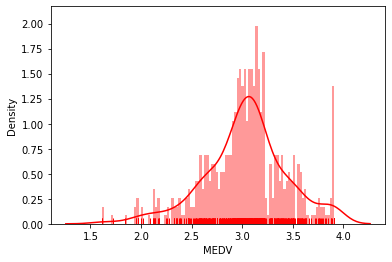

In [42]:
plt.figure()
sns.distplot(np.log(house["MEDV"]),
            bins=100,#柱子的个数
            hist=True,#是否绘制直方图
            kde=True,#是否绘制密度图
            rug=True,#数据分布标尺
            color='r',#颜色
#             vertical=False,#是否水平绘制
#             norm_hist=False,#标准化，kde为True时自动标准化
            axlabel=None,#x轴标注
            label=None,#图例标签，通过plt.legend()显示
            ax=None,
            )

这样的变换之后，我们到时候可以将取值小于1.5的取值视为异常值，将其抛弃掉. 

这里多说一句，对于分类任务而言，我们也可以采用此法画出它的频率分布直方图，或者直接更直接的画图条形统计图.，如果分类的标签分布是相似的，那么我们可以直接建模. 但如果标签出现很明显的一高一低的情况，说明标签的分布不均衡，那再建模前需要做一些操作（例如：欠采样、调整损失函数），再进行建模. 否则会出现一个问题，模型会对出现频率低的样本非常不敏感. 这就好像数学考试前的复习题，大多数都是数列题，只有一个是立体几何题目，大家花了很多精力研究数列，结果一到考试，出现了很多立体几何的题目，这时候我们复习的效果其实会显得很差. 模型训练的过程就类似考前复习的过程，所以我们在建模前要尽量保证标签的均衡性.

2. **离散型变量**

对于类别型变量而言，一般观察其分布我们采用柱状图的方式.

In [46]:
df_stats(null)

,Feature,missing num,missing rate,unique num
0,CRIM,0,0.0,504
1,ZN,0,0.0,26
2,INDUS,0,0.0,76
3,CHAS,0,0.0,2
4,NOX,0,0.0,82
5,RM,0,0.0,446
6,AGE,0,0.0,357
7,DIS,0,0.0,402
8,RAD,0,0.0,9
9,TAX,0,0.0,66


从这个表的最后一列可以看出```CHAS```,```RAD```这样的变量的取值比较符合分类变量的特征，同时阅读特征说明亦可得以确认，我们将其柱状图进行刻画

array([[<AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'RAD'}>]], dtype=object)

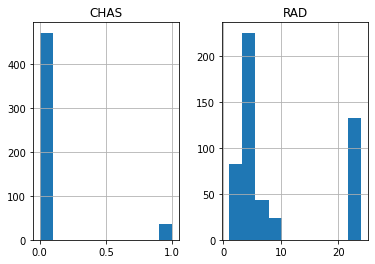

In [51]:
house[['CHAS', 'RAD']].hist()

当然类别型变量更大的作用是用于后续在特征工程中，用于进行特征交叉，继续特征的增强，挖掘更深层次的潜在信息.

3. **连续型变量**

同上，我们先绘制出连续型变量的分布情况.

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>]],
      dtype=object)

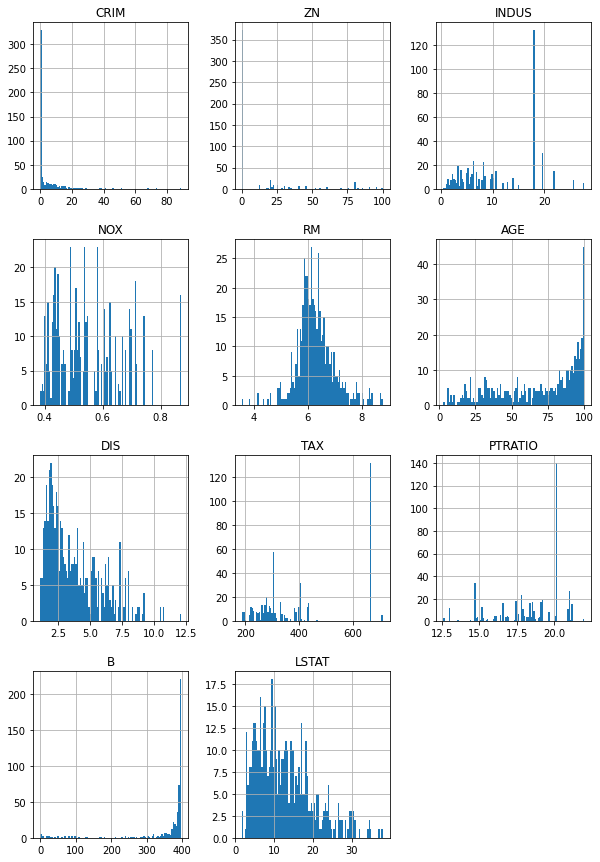

In [62]:
house[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']].hist(figsize = (10, 15), bins = 100)

从上面的图像可以看出，有些变量实际上是有相似（A高B高）的分布情况的，或者相反的分布情况的（A高B低）,这样的性质称为**变量之间的相关性**. 相关性一般有两种情况：
- **正相关**：如果特征A的增加（减少）会导致特征B增加（减少），即特征A与特征B变化趋势相同.
- **负相关**：如果特征A的增加（减少）会导致特征B减少（增加），即特征A与特征B变化趋势相反.

当两个变量呈正相关或者负相关时，我们称两个变量是相关的. 如果两个变量有较强的相关性时，如果将这些变量一起用的话，会有很多是冗余的. 因为这样变量之间有较强的相关性，那么变量与变量之间是可以相互表示的，所以在建模时，需要尽可能消除特征之间的**共线性**，也就是尽量使用相关性比较小的特征，这样可以减少训练时间，使得模型的学习效果更好.那么下面我们讲讲如何去刻画特征间的相关性.

### 多变量分析
#### 相关性

首先我们先从可视化的角度来研究变量之间的相关性，对于可视化而言，最简单的方式就是将两个特征对应的坐标点在坐标系下描出来，研究他们的变化趋势，也就是说每一个点的坐标试一个二元组$(x^{(i)}_A, y^{(i)}_B)$，其中$x^{(i)}_A$表示第$i$个样本，特征$A$的取值；$y^{(i)}_B$表示第$i$个样本，特征$B$的取值. 我们用```seaborn```库可以很直观的任意两个特征之间的散点图.

⚠️ 如下的代码，密集恐惧症患者谨慎运行！

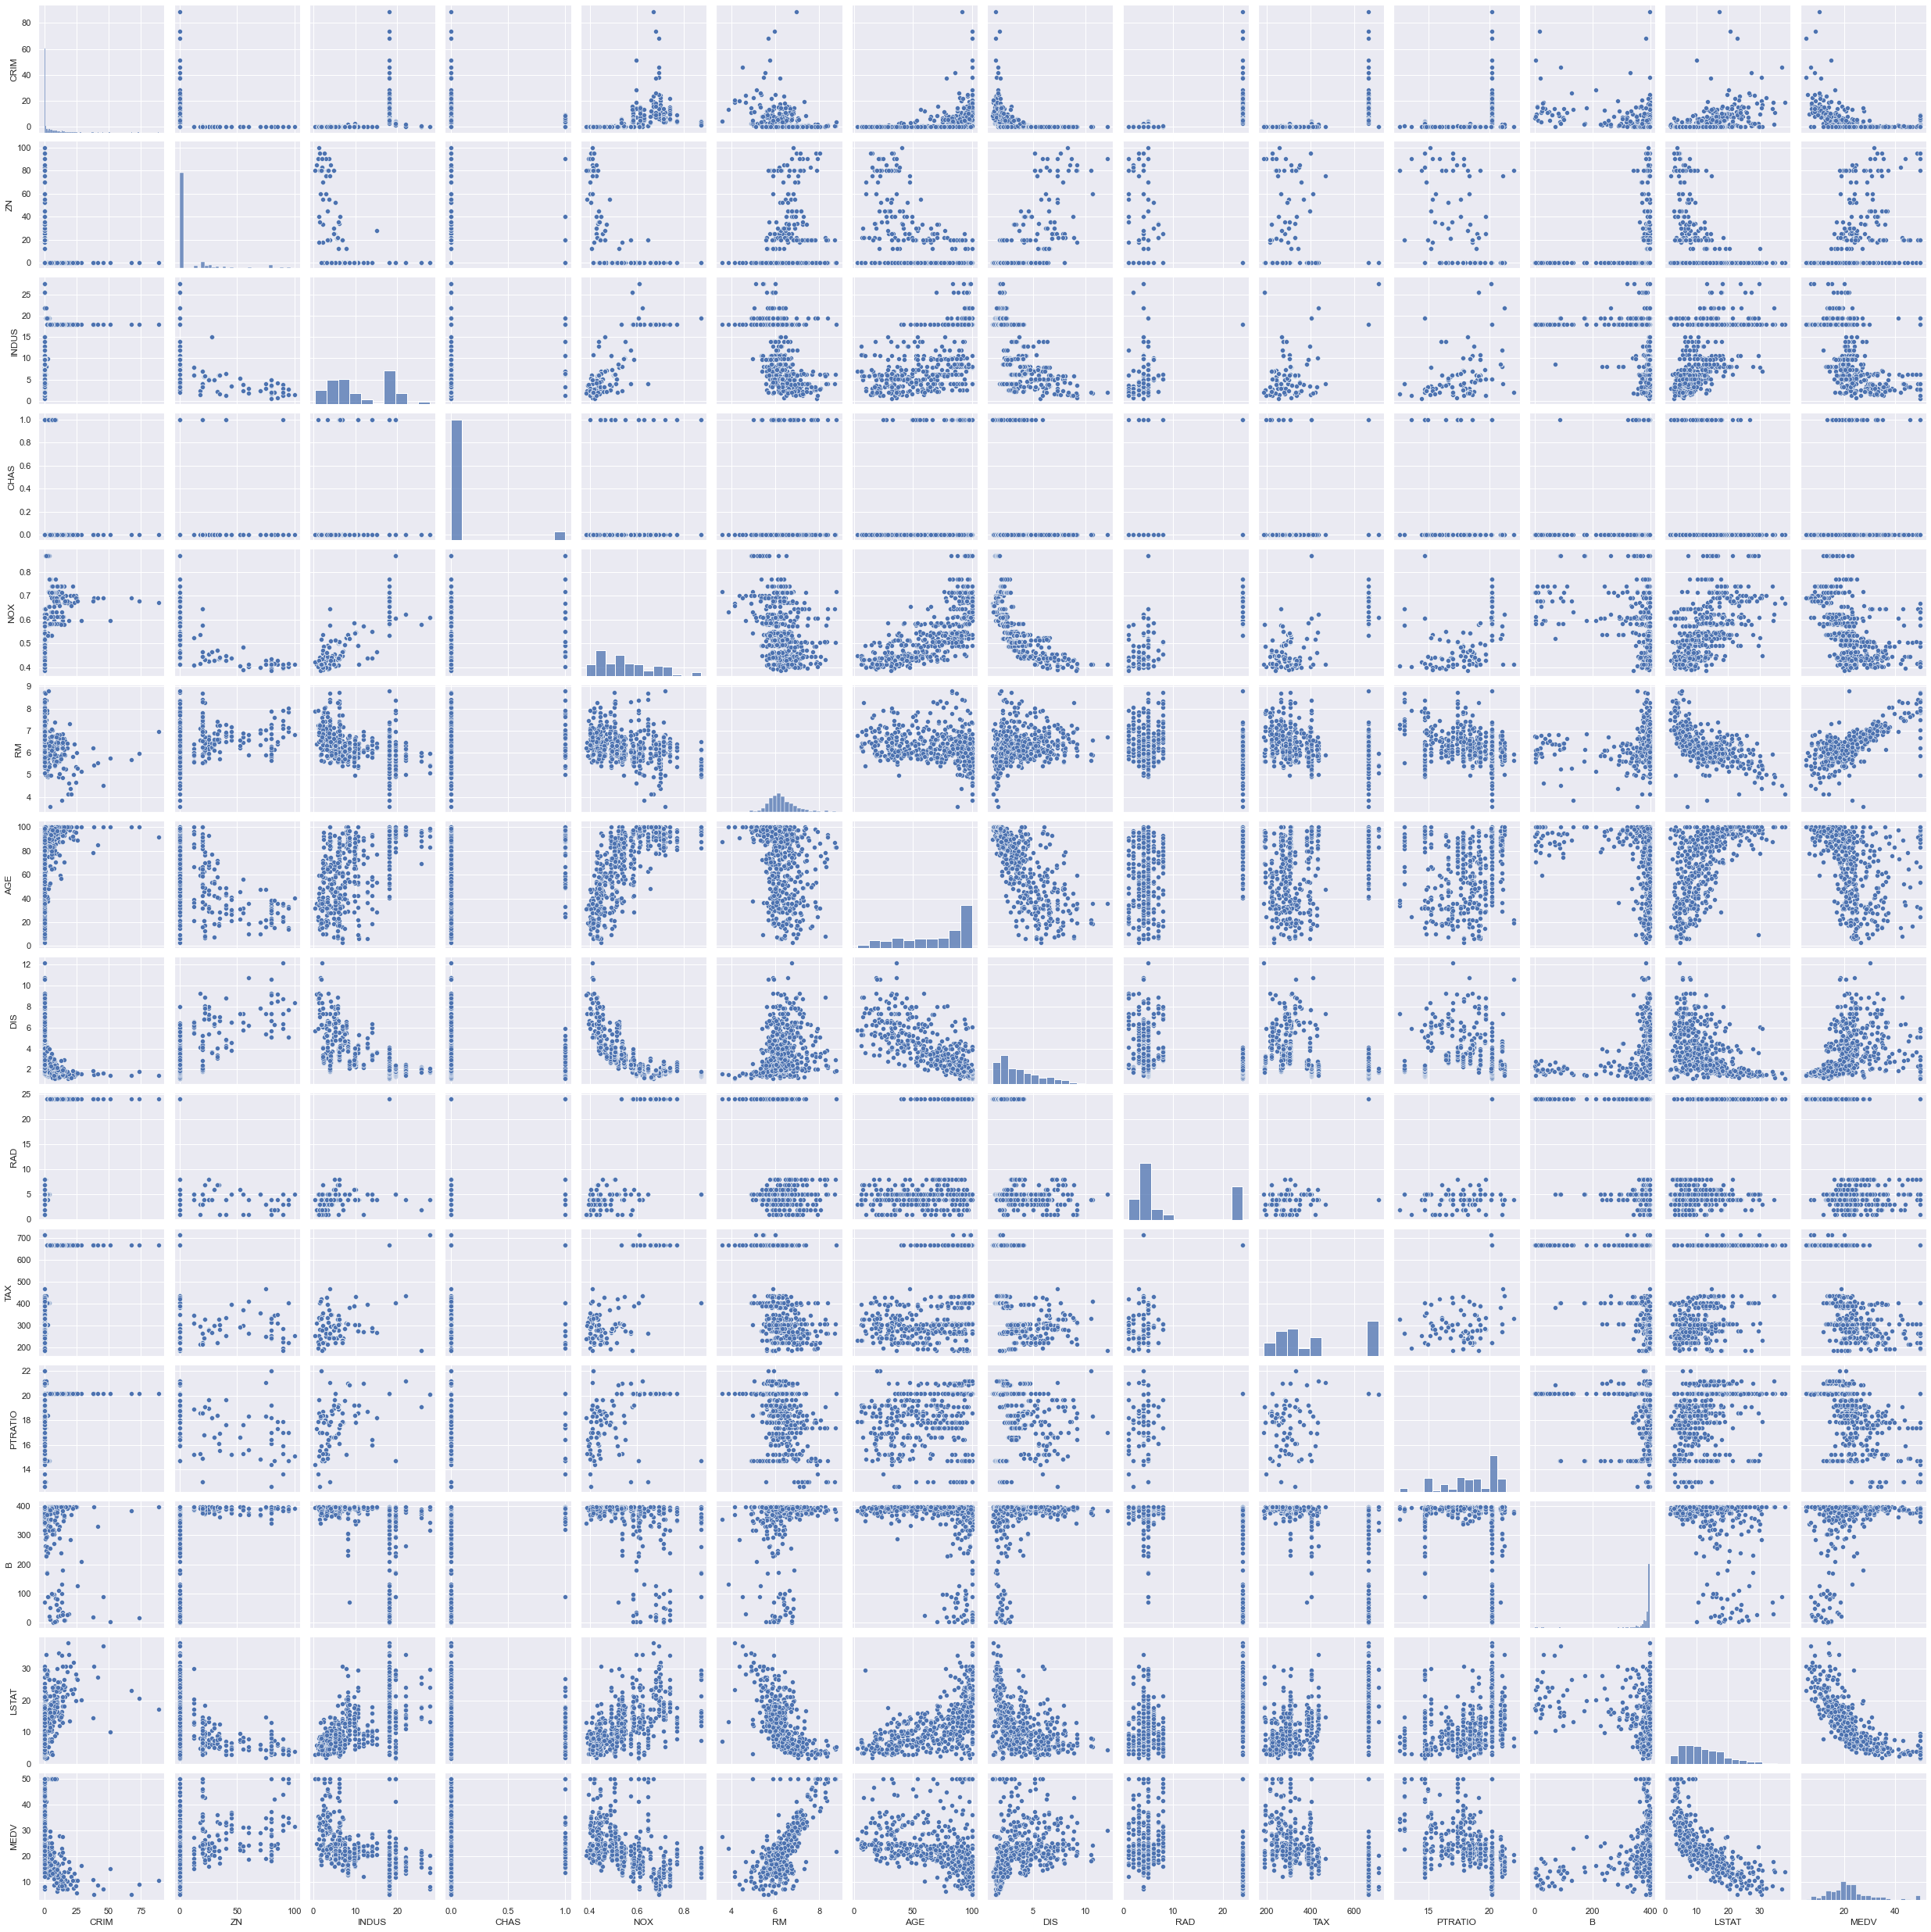

In [67]:
# 任意两个变量间的相关性散点图
sns.set()
cols = house.columns # 罗列出数据集的所有列
sns.pairplot(house[cols], size = 2.5) # 成对画出任意两列的散点图
plt.show() # 显示函数

大家如果第一次见到上面的图，可能会被震惊到，并且一时间不知道该看哪里.
- 首先，我们先看图像呈“对角线分布的”，即```/```或者```\```这两种类型分布的图像，这样的图像说明这两个变量间有较强的相关性，是可以被消除共线性的“嫌疑对象”. 如图中的```DIS```和```AGE```,尽管他不是严格的直线分布，但至少其分布呈现带状；



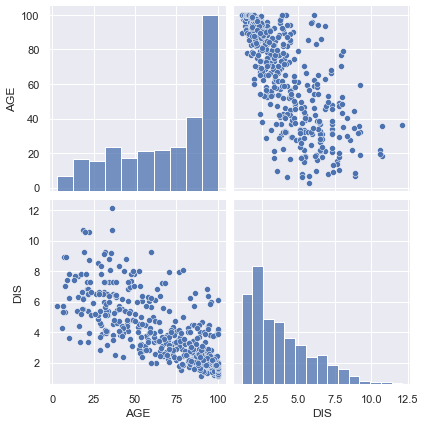

In [85]:
sns.pairplot(house[["AGE", "DIS"]], size = 3) # 成对画出任意两列的散点图, size是点的大小

- 其次，我们可以看那些趋势比较明显单调，但是不太像直线，而是类似于“对数函数”的图像，例如图中的```DIS```和```NOX```,因为这类图像，只要做一下对数化，马上就可以得到类似直线的效果,那么也是可以被处理的.

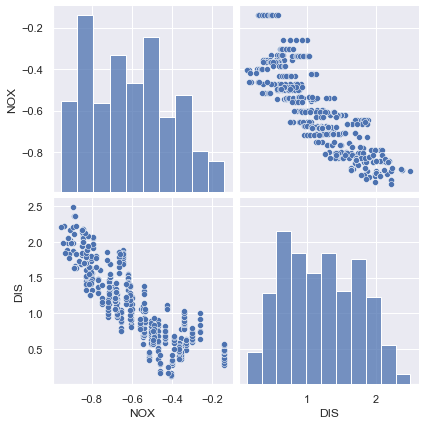

In [87]:
sns.pairplot(np.log(house[["NOX", "DIS"]]), size = 3) # 成对画出任意两列的散点图, size是点的大小

- 我们还需要关注最后一行（列）与其他行（列）的关系，也就是特征与标签的关系，如果这两者出现了较强相关性，那么这些特征我们需要留意，因为这些特征对标签有着比较直接的关系，例如```RM```和```LSTAT```.

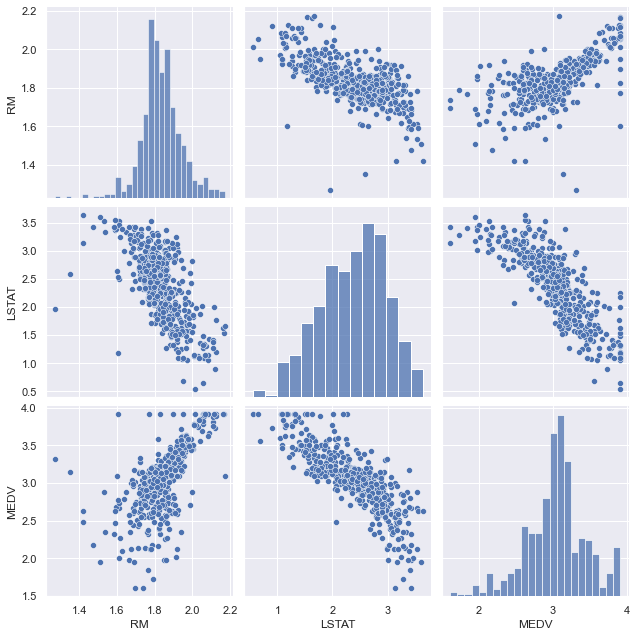

In [89]:
sns.pairplot(np.log(house[["RM", "LSTAT", "MEDV"]]), size = 3) # 成对画出任意两列的散点图, size是点的大小

但是仅仅从图像上去看还是太过于感性了，只能大致的判断出趋势，那么有没有办法刻画“两个特征非常相关”，又或者“两个变量没那么相关”呢？答案是肯定的，大家可以回想一下我们在《概率论与数理统计》中学到的刻画两个随机变量的相关性的方法：**协方差**与**相关系数**.

$$协方差: \sigma_{ij}=\operatorname{cov}\left(X_{i}, X_{j}\right)= E \left[\left(X_{i}-\mu_{i}\right)\left(X_{j}-\mu_{j}\right)\right]$$

其中，$X_{i},X_{j}$是第$i, j$个随机变量，因此我们可以诱导出协方差矩阵
$$\Sigma = (\sigma_{ij})$$

回顾协方差的定义，若变量$X_{i}$的较大值主要与另一个变量$X_{j}$的较大值相对应，而两者的较小值也相对应，则可称两变量倾向于表现出相似的行为，协方差为正。在相反的情况下，当一个变量的较大值主要对应于另一个变量的较小值时，则两变量倾向于表现出相反的行为，协方差为负。即协方差之正负号显示著变量的相关性。

当我们有了一系列数据后，我们可以认为这一系列数据是从对应的分布里面采样得到的，可以当成随机变量的观测值，因此可以直接代入算期望.




In [91]:
# 对数据集直接计算协方差
# 注意 只有数值型变量才能算，类别或文本需要编码后才能计算
house.cov()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


但是协方差只能看出正相关和负相关，其大小并没有意义，这是因为每个特征的量纲不同，直接乘积后求期望，所得到的量纲又是不尽相同，因此我们需要对其做“无量纲化”处理，也就有了**相关系数**
$$
r(X, Y)=\frac{\operatorname{Cov}(X, Y)}{\sqrt{\operatorname{Var}[X] \operatorname{Var}[Y]}}
$$
其中, $\operatorname{Cov}( X , Y )$ 为 $X$ 与 $Y$ 的协方差, $\operatorname{Var}[ X ]$ 为 $X$ 的方差, $\operatorname{Var}[Y]$ 为 $Y$ 的方差.

1. $\left|r(X, Y)\right| \leq 1$
2. $\left|r(X, Y)\right|=1$ 的充要条件是, 存在常数$a$, $b$, 使得 $P\{Y=a+b X\}=1$

也就是说相关系数定量地刻画了 $X$ 和 $Y$ 的相关程度，即 $\left|r(X, Y)\right|$ 越大，相关程度越大; $\left|r(X, Y)\right|=0$ 对应相关程度最低; $X$ 和 $Y$ 完全相关的含义是在概率为1的意义下存在线性关系, 于是 $\left|r(X, Y)\right|$ 是一个可以表征$X$ 和 $Y$ 之间线性关系紧密程度量。当 $\left|r(X, Y)\right|$ 较大时, 通常说 $X$ 和$Y$ 相关程度较好；当 $\left|r(X, Y)\right|$ 较小时, 通常说 $X$ 和 $Y$ 相关程度较差; 当$X$和$Y$不相关, 通常认为$X$ 和 $Y$ 之间不存在线性关系, 但并不能排除 $X$ 和 $Y$ 之间可能存在其他关系。

In [ ]:
# 请你尝试实现相关系数的计算
def Corr(X, Y):
    '''
    计算随机变量X，Y的相关系数.
    X: np.array or pd.Series.
    Y: np.array or pd.Series.
    '''
    COV_XY = #--------- #协方差矩阵
    std_X = #--------- # X的标准差
    std_Y = #--------- # Y的标准差
    
    Corr_Matrix = COV_XY / (std_X * std_Y)
    
    return #--------- # 填写相应的索引形式
    

In [ ]:
# (np.cov(house['AGE'], house['DIS'])/ ((np.std(house['AGE']) * np.std(house['DIS']))))[0,1]
Corr(house['AGE'], house['DIS'])

In [99]:
# 直接计算相关性系数
Corr_Matrix = house.corr()
Corr_Matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


更进一步，我们可以对上面的相关性系数，采用热力图进行可视化，这样就会更加直观.

<AxesSubplot:>

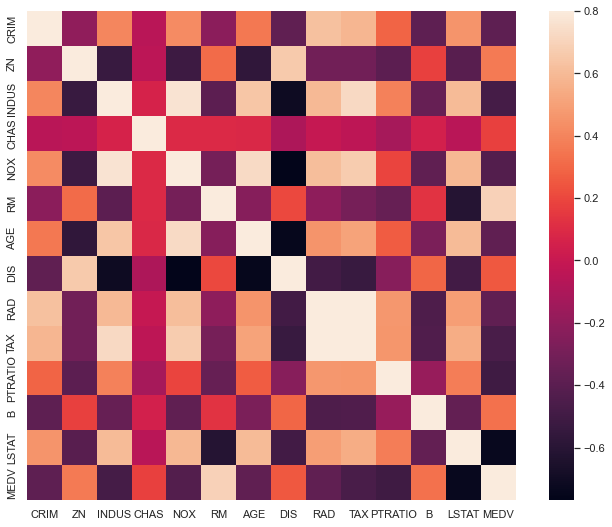

In [104]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9)) # 设置画布
sns.heatmap(Corr_Matrix, vmax=.8, square=True # 画热力图
#             , annot=True # s是否显示数值
           )

## 参考链接
- [kaggle可视化](https://www.kaggle.com/code/weibbi/boston-housing-price-w-visual-eda-prediction)
- [kaggle方案](https://www.kaggle.com/code/imakash3011/boston-house-prices-advanced-regression-technique)
- [plotly安装](https://zhuanlan.zhihu.com/p/328972379)
- [Kaggle高分方案](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook)